In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

64
398
   cfdDNA_(%) Clinical_signs_of_rejection  DaysPostTransplant patient  \
0     0.31048                          No                  48      L1   
1     0.61340                          No                 391      L1   
2     0.20844                          No                 104      L1   
3     0.32692                          No                 167      L1   
4     0.11958                          No                 202      L1   
5     0.21814                          No                 209      L1   
6     0.48760                          No                 283      L1   
7     4.27806                          No                  13      L1   
8     0.27446                          No                  52     L10   
9     0.67024                          No                 367     L10   

  Sample Name  
0     L1-M1_5  
1      L1-M13  
2       L1-M2  
3     L1-M5_5  
4     L1-M6_5  
5       L1-M7  
6       L1-M9  
7       L1-W2  
8    L10-M1_5  
9     L10-M12  


Text(0.5, 1.2, 'True % ddcfDNA for patients across various days post transplant')

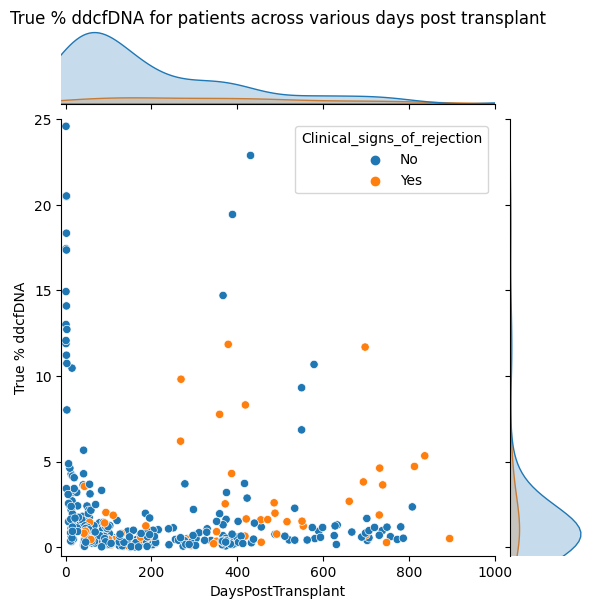

In [9]:
df = pd.read_csv('/hpc/compgen/projects/fragclass/analysis/mvivekanandan/script/madhu_scripts/one_time_use_side_scripts/true_data.txt', delimiter = ",")
df = df[['cfdDNA_(%)', 'Clinical_signs_of_rejection', 'DaysPostTransplant', 'patient', 'Sample Name']]
count = (df['Clinical_signs_of_rejection'] == "Yes").sum(axis=0)
print(count)
print(len(df))
mask1 = df['cfdDNA_(%)'] >= 0
df = df[mask1]
mask2 = df['DaysPostTransplant'] >= 1
df = df[mask2]
print(df.head(10))
to_plot_df = df.drop(['Sample Name'], axis = 1)

to_plot_df = to_plot_df.rename(columns={'cfdDNA_(%)': 'True % ddcfDNA'})

sns.jointplot(data=to_plot_df, x="DaysPostTransplant", y='True % ddcfDNA', hue="Clinical_signs_of_rejection", xlim=(-10, 1000), ylim=(-0.5, 25))
plt.title("True % ddcfDNA for patients across various days post transplant", y=1.2, fontsize=12)

# for patient_id in to_plot_df['patient'].unique():
#     patient_data = to_plot_df[to_plot_df['patient'] == patient_id]
#     plt.plot(patient_data['DaysPostTransplant'], patient_data['cfdDNA_(%)'], color='gray', alpha=0.2, zorder =0)

In [18]:
type(to_plot_df['patient'])
print(to_plot_df["patient"].head(10))

  patient patient
0      L1      L1
1      L1      L1
2      L1      L1
3      L1      L1
4      L1      L1
5      L1      L1
6      L1      L1
7      L1      L1
8     L10     L10
9     L10     L10


In [29]:
df.groupby('patient')['Clinical_signs_of_rejection'].count()

patient
L1      8
L10    11
L11     8
L13    10
L14    10
L15     9
L16     7
L17     8
L19     6
L2      2
L20     9
L21     4
L22     1
L24     8
L25     5
L26     5
L28     5
L29    13
L3      3
L30     9
L31    10
L33     9
L34     6
L35     8
L36     9
L4      2
L41    11
L49    11
L5      8
L50    13
L54     5
L57     7
L58     7
L59    10
L6      6
L64     5
L68    10
L69     8
L7      2
L74    13
L75    13
L77    11
L78     5
L79     4
L8      8
L80     5
L81    12
L82     1
L85     6
L9      6
L9b     8
Name: Clinical_signs_of_rejection, dtype: int64

In [30]:
df

,cfdDNA_(%),Clinical_signs_of_rejection,DaysPostTransplant,patient,Sample Name
0,0.31048,No,48,L1,L1-M1_5
1,0.61340,No,391,L1,L1-M13
2,0.20844,No,104,L1,L1-M2
3,0.32692,No,167,L1,L1-M5_5
4,0.11958,No,202,L1,L1-M6_5
...,...,...,...,...,...
393,0.29226,No,47,L9b,L9b-M2
394,0.02178,No,84,L9b,L9b-M3
395,0.22440,No,106,L9b,L9b-M3-5
396,0.16228,No,288,L9b,L9b-M9


In [1]:
import scipy.stats
x = [0.216, 0.766, 0.736, 0.717, 1.0, 0.851, 1.33, 2.26, 2.33, 2.86, 5.79]
y = [45.8, 48.5, 41.5, 41.2, 49.9, 52.2, 40.6, 49.8, 51.7, 53.9, 44.8]

correlation, p_value = scipy.stats.pearsonr(x, y)
print(f"Correlation: {correlation}, P value: {p_value}")

Correlation: 0.14352384257898956, P value: 0.6737537491509354
